In [2]:
!pip install pandas_ml

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing
import sklearn as sk
from sklearn.decomposition import PCA

In [4]:
from google.colab import files
uploaded=files.upload()

Saving sources.csv to sources (1).csv


In [0]:
import io
su=pd.read_csv(io.BytesIO(uploaded['sources.csv']))

In [0]:
dl=['COUNTRY','STATE/PROVINCE','LOCATION','LATITUDE','LONGITUDE']
su=su.drop(dl,axis=1)

In [0]:
su.fillna(0,inplace=True)

In [8]:
su.astype(int).dtypes

SOURCE_ID                     int64
YEAR                          int64
MONTH                         int64
DAY                           int64
HOUR                          int64
MINUTE                        int64
CAUSE                         int64
VALIDITY                      int64
FOCAL_DEPTH                   int64
PRIMARY_MAGNITUDE             int64
REGION_CODE                   int64
MAXIMUM_HEIGHT                int64
MAGNITUDE_ABE                 int64
MAGNITUDE_IIDA                int64
INTENSITY_SOLOVIEV            int64
WARNING_STATUS                int64
MISSING                       int64
MISSING_ESTIMATE              int64
INJURIES                      int64
INJURY_ESTIMATE               int64
FATALITIES                    int64
FATALITY_ESTIMATE             int64
DAMAGE_MILLIONS_DOLLARS       int64
DAMAGE_ESTIMATE               int64
HOUSES_DAMAGED                int64
HOUSE_DAMAGE_ESTIMATE         int64
HOUSES_DESTROYED              int64
HOUSE_DESTRUCTION_ESTIMATE  

In [0]:
from sklearn.model_selection import train_test_split
X=su.iloc[:,:-1]
y=su['REGION_CODE']
scale=StandardScaler()
Xn=scale.fit_transform(X)
pca=PCA(n_components=30)
Xs=pca.fit_transform(Xn)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.33, random_state=42)

In [10]:
from sklearn import  linear_model
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
print("Accuracy",lr.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy 0.5005861664712778


In [0]:
y_predicted = np.array(lr.predict(X_test))
y_prob1=lr.predict_proba(X_test)[:,1]
y_prob2=lr.predict_proba(X_test)[:,2]

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Confusion matrix:
Predicted  0.0  30.0  40.0  50.0  60.0  ...  86.0  87.0  88.0  89.0  __all__
Actual                                  ...                                 
0.0          0     0     0     1     0  ...     0     0     0     0        1
30.0         0     0     0     2     0  ...     0     0     0     0        2
40.0         0     0     0     7     0  ...     0     0     0     0        7
50.0         0     0     0   142     0  ...     0     0     0     0      142
60.0         0     0     0    26    22  ...     0     1     0     0       50
71.0         0     0     0     0     1  ...     0     0     0     0        2
72.0         0     0     0     0     0  ...     0     0     0     0        1
73.0         0     0     0     3     0  ...     0     1     0     0       36
74.0         0     0     0     0     2  ...     0     0     0     0       37
75.0         0     0     0     0     0  ...     0     0     0     0       21
77.0         0     0     0     0     0  ...     0     0   

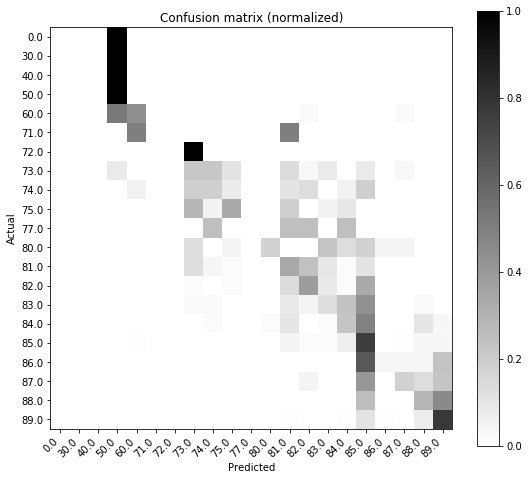

/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:302: RuntimeWarning: invalid value encountered in true_divide
  * (self.TN + self.FP) * (self.TN + self.FN)))
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:330: RuntimeWarning: invalid value encountered in double_scala

Confusion Matrix:

Predicted  0.0  30.0  40.0  50.0  60.0  ...  86.0  87.0  88.0  89.0  __all__
Actual                                  ...                                 
0.0          0     0     0     1     0  ...     0     0     0     0        1
30.0         0     0     0     2     0  ...     0     0     0     0        2
40.0         0     0     0     7     0  ...     0     0     0     0        7
50.0         0     0     0   142     0  ...     0     0     0     0      142
60.0         0     0     0    26    22  ...     0     1     0     0       50
71.0         0     0     0     0     1  ...     0     0     0     0        2
72.0         0     0     0     0     0  ...     0     0     0     0        1
73.0         0     0     0     3     0  ...     0     1     0     0       36
74.0         0     0     0     0     2  ...     0     0     0     0       37
75.0         0     0     0     0     0  ...     0     0     0     0       21
77.0         0     0     0     0     0  ...     0     0  

In [12]:
y_predicted = np.array(lr.predict(X_test))
y_right = np.array(y_test)
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
ans=mean_absolute_error(y_test,y_predicted)
ans1=mean_squared_error(y_test,y_predicted)
print("Mean Absolute Error Is:",ans)
print("Mean Squared Error Is:",ans1)

Mean Absolute Error Is: 2.0844079718640094
Mean Squared Error Is: 19.957796014067995


In [14]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
        30.0       0.00      0.00      0.00         2
        40.0       0.00      0.00      0.00         7
        50.0       0.78      1.00      0.88       142
        60.0       0.85      0.44      0.58        50
        71.0       0.00      0.00      0.00         2
        72.0       0.00      0.00      0.00         1
        73.0       0.24      0.22      0.23        36
        74.0       0.33      0.19      0.24        37
        75.0       0.41      0.33      0.37        21
        77.0       0.00      0.00      0.00         4
        80.0       0.80      0.18      0.30        22
        81.0       0.32      0.34      0.33        53
        82.0       0.46      0.39      0.42        57
        83.0       0.21      0.13      0.16        46
        84.0       0.33      0.23      0.27        61
        85.0       0.37      0.76      0.50       109
        86.0       0.33    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
regions = {77:'West Coast of Africa',
            78:'Central Africa',
            73:'Northeast Atlantic Ocean',
            72:'Northwest Atlantic Ocean',
            70:'Southeast Atlantic Ocean',
            71:'Southwest Atlantic Ocean',
            75:'E. Coast USA and Canada, St Pierre and Miquelon',
            76:'Gulf of Mexico',
            74:'Caribbean Sea',
            40:'Black Sea and Caspian Sea',
            50:'Mediterranean Sea',
            30:'Red Sea and Persian Gulf',
            60:'Indian Ocean (including west coast of Australia)',
            87:'Alaska (including Aleutian Islands)',
            84:'China, North and South Korea, Philippines, Taiwan',
            81:'E. Coast Australia, New Zealand, South Pacific Is.',
            80:'Hawaii, Johnston Atoll, Midway I',
            83:'E. Indonesia (Pacific Ocean) and Malaysia',
            82:'New Caledonia, New Guinea, Solomon Is., Vanuatu',
            86:'Kamchatka and Kuril Islands',
            85:'Japan',
            88:'West Coast of North and Central America',
            89:'West Coast of South America'}


su['REGIONS'] = su['REGION_CODE'].map(regions)
su['REGIONS_FRECUENCY']=su.groupby(su.REGIONS)['REGIONS'].transform('count')

In [21]:
ans=[]
for i in range(len(y_predicted)):
  ans.append(regions[y_predicted[i]])
print(max(y_predicted),max(ans))

89.0 West Coast of South America
